In [ ]:
# Introduction to ML 
# Used Libraries - random, numpy, pandas, sklearn

In [ ]:
# Terms in Machine learning

# 1. Collection : Data used for training, validating and testing the Machine learning model

# 2. Feature (X) : Independent variable or input variable -used to predict the target variable

# 3. Target (Y) : Dependent variable - output - we want to predict -      Example : Predicting Number of bedrooms

# 4. Training Data : Subset of dataset used to train the model

# 5. Testing Data : Subset of dataset used to validate the trained model

# 6. Model : Mathematical representation of relationship between feature and target

# 7. Supervised Learning (SL) : Training the model based on labeled data || model learns from known/ labeled data

# 8. Regression : Method to predict continuos values from a model - supervised learning

# 9. Overfitting : when a model learns from training data too well, includes noise - perform poorly new data

# 10. Underfitting : Model is too simpler and does not capture patterns in data


# # Categories in Machine learning :

# 1. Supervised learning :
# 	Model learns from labeled data - i/o pairs
# 	Exmaple : Linear regression, Decision trees, Random forest, SVM
#   Best use case so far : House price prediction based on previous/historical data

# 2. Unsupervised learning : 
# 	Model finds new patterns in unlabeled data without predefined data/labels
# 	Example : Clustering (K means), PCA
# 	Use case : Customer segmentation in marketing

# 3. Reinforcement learning : 
# 	Model learns by interacting with environment and receiving the rewards or penalities
#	Example : Deep learning , AlphaGo,..
#   Best use case  : Self car driving vehicles, Self learning AI bots, SLAM 


In [ ]:
# Example : Predicting the House price - Random dataset - generated

# Steps :
# 1. Generate a random dataset
# 2. Train a ML model - linear regression
# 3. Evaluate the Model 
# 4. Make prediction

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [63]:
# Step 1 : Generate a random dataset
np.random.seed(42) # Used to set same sequence of values for the random package
numSamples = 1000

#create numSamples number of samples from (800, 5000)
size = np.random.randint(800, 5000, numSamples) 

bedrooms = np.random.randint(1, 6, numSamples)
washrooms = np.random.randint(1, 8, numSamples)
localityScore = np.random.randint(1, 10, numSamples)

# Generate House prices with randomness
housePrice = (size * 3000) + (bedrooms * 50000) + (washrooms * 30000) + (localityScore * 70000) + np.random.randint(-50000, 50000, numSamples)

# Create a dataframe 
df =pd.DataFrame(
	{
		'Size' : size,
		'Bedrooms' : bedrooms,
		'Washrooms' : washrooms,
		'Locality Score' : localityScore,
		'Price' : housePrice
	}
)

In [64]:
df

,Size,Bedrooms,Washrooms,Locality Score,Price
0,1660,2,6,1,5372420
1,4572,5,4,3,14278854
2,3892,1,2,9,12442240
3,1266,1,4,7,4498063
4,4244,1,4,2,13008322
...,...,...,...,...,...
995,1550,3,3,3,5068323
996,2562,5,7,7,8604019
997,4720,4,4,6,14925426
998,1281,5,4,9,4833863


In [14]:
# Step 2 : Train a ML model - linear regression

# Package (installation) requirements :
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
X = df[['Size','Bedrooms','Washrooms','Locality Score']]
Y = df['Price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
# Step 3 : Evaluate the Model
# Package Requirements :
# sklearn.metrics 

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error : {RMSE}')


Mean Absolute Error : 22704.790027973082
Mean Squared Error : 720671663.7205502
Root Mean Squared Error : 26845.328526962567


In [83]:
# Step 4 : Make prediction
newHouse = np.array([[10000,10,10,10]])
predictedPrice = model.predict(newHouse)
print(f'The predicted prize of new house is {predictedPrice[0]}')

The predicted prize of new house is 31499447.00111331


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
print(f'The predicted prize of new house is {predictedPrice[0]}')

The predicted prize of new house is 31499447.00111331


/var/folders/s7/7_w1pvts5wq30xp_7zcq2r5h0000gn/T/ipykernel_89210/917756630.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


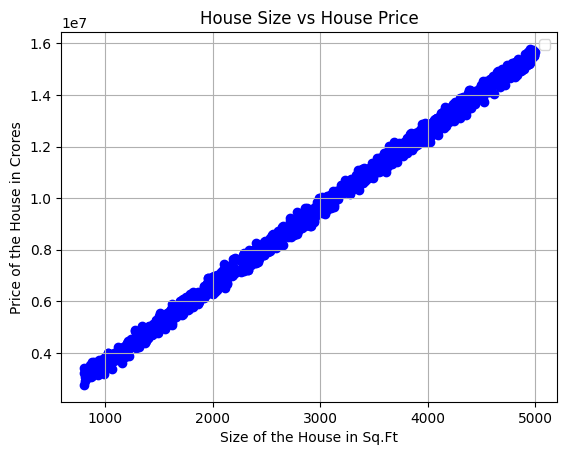

In [85]:
plt.scatter(df['Size'], df['Price'], color = 'blue')
# plt.plot(df['Size'],np.reshape(y_pred,), color = 'red', linewidth = 2)
plt.xlabel('Size of the House in Sq.Ft')
plt.ylabel('Price of the House in Crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()


In [86]:
XSorted = np.sort(X,axis=0)
yPred = model.predict(XSorted)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


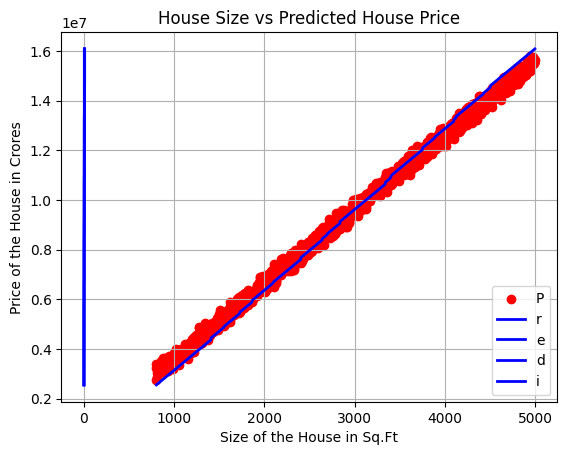

In [87]:
plt.scatter(df['Size'], df['Price'], color = 'red')
plt.plot(XSorted, yPred, color = 'blue', linewidth = 2,label="Regression Line")
plt.xlabel('Size of the House in Sq.Ft')
plt.ylabel('Price of the House in Crores')
plt.legend('Predicted price')
plt.grid(True)
plt.title('House Size vs Predicted House Price')
plt.show()
